In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [4]:
cd ~/Documents/Github/GSTEM/data/sampledata

/Users/catherinezhou/Documents/GitHub/GSTEM/data/sampledata


In [6]:
data = pd.read_csv("train.csv")

In [11]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


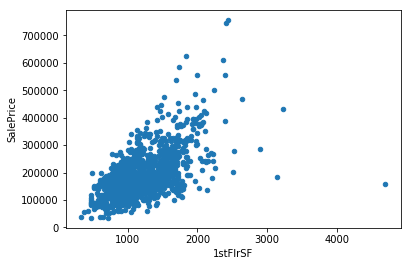

In [13]:
%matplotlib inline
data.plot(x = "1stFlrSF", y = "SalePrice", kind = 'scatter')

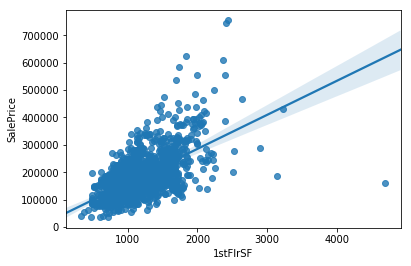

In [28]:
import seaborn as sns
sns.regplot("1stFlrSF","SalePrice", data)

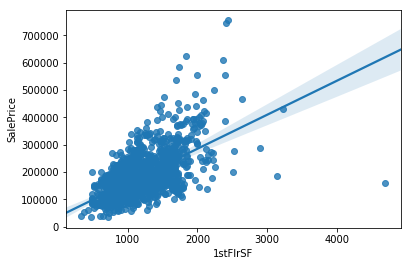

In [29]:
sns.regplot(data["1stFlrSF"], data["SalePrice"])

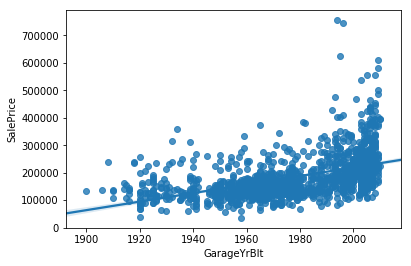

In [31]:
sns.regplot(data["GarageYrBlt"], data["SalePrice"])
# Not a good predictor 

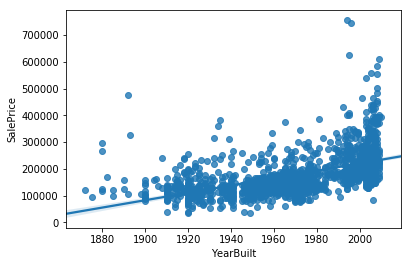

In [34]:
sns.regplot(data["YearBuilt"], data["SalePrice"])

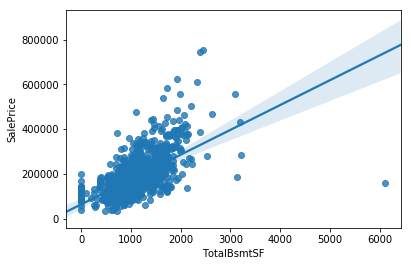

In [35]:
sns.regplot(data["TotalBsmtSF"], data["SalePrice"])

Coefficients: 
 [[1282.51783795]]
Root Mean squared error (RMSE): 72772.10


Text(0,0.5,'Selling Price')

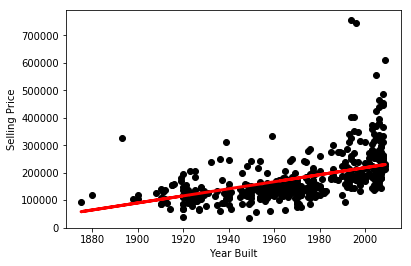

In [14]:
# Set x and y axes 
x = data[["YearBuilt"]]
y = data[['SalePrice']]

# Split the data 
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)
# 0.33 = 33% saved for testing set 
# 0.67 = 67% saved for training + validation 

# Fitting model for training set
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_) 

# Why is RMSE calculated before the validation set is plotted? 
#It works when it's calculated after too. 

print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

# Apply same model to validation set and set trend line  
ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Year Built")
ax.set_ylabel("Selling Price")

Coefficients: 
 [[43696.47641718]]
Root Mean squared error (RMSE): 51746.72


Text(0,0.5,'Selling Price')

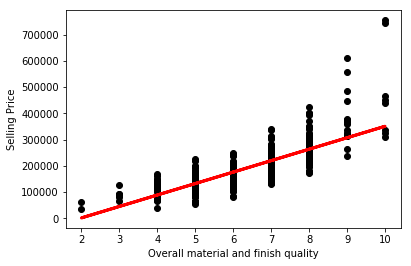

In [39]:
# Set x and y axes 
x = data[["OverallQual"]]
y = data[['SalePrice']]

# Split the data into the training and validation 
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)
# 0.33 = 33% saved for validation
# 0.67 = 67% saved for train 

# linear regression model of training set 
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))


ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Overall material and finish quality")
ax.set_ylabel("Selling Price")


Coefficients: 
 [[98.50395317]]
Root Mean squared error (RMSE): 56577.61


Text(0,0.5,'Selling Price')

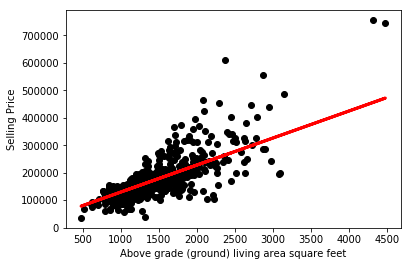

In [44]:
# Set x and y axes 
x = data[["GrLivArea"]]
y = data[['SalePrice']]

# Split the data into the training and validation 
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)
# 0.33 = 33% saved for validation
# 0.67 = 67% saved for train 

# linear regression model of training set 
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))


ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Above grade (ground) living area square feet")
ax.set_ylabel("Selling Price")

Coefficients: 
 [[226.93274858]]
Root Mean squared error (RMSE): 67299.54


Text(0,0.5,'Selling Price')

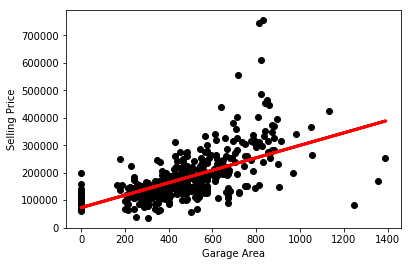

In [47]:
# Set x and y axes 
x = data[["GarageArea"]]
y = data[['SalePrice']]

# Split the data into the training and validation 
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)
# 0.33 = 33% saved for validation
# 0.67 = 67% saved for train 

# linear regression model of training set 
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))


ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Garage Area")
ax.set_ylabel("Selling Price")

Coefficients: 
 [[53772.7636519]]
Root Mean squared error (RMSE): 75357.51


Text(0,0.5,'Selling Price')

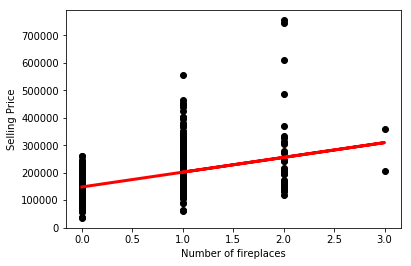

In [84]:
# Set x and y axes 
x = data[["Fireplaces"]]
y = data[['SalePrice']]

# Split the data into the training and validation 
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)
# 0.33 = 33% saved for validation
# 0.67 = 67% saved for train 

# linear regression model of training set 
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))


ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Number of fireplaces")
ax.set_ylabel("Selling Price")

# Surprisingly more relevant to sale price than overall condition rating (next cell)

Coefficients: 
 [[-4710.19001992]]
Root Mean squared error (RMSE): 85347.52


Text(0,0.5,'Selling Price')

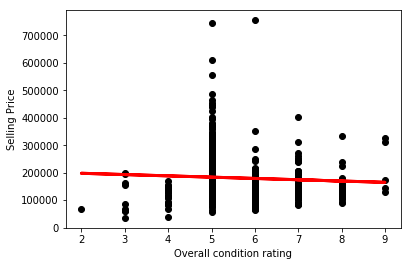

In [79]:
# Set x and y axes 
x = data[["OverallCond"]]
y = data[['SalePrice']]

# Split the data into the training and validation 
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)
# 0.33 = 33% saved for validation
# 0.67 = 67% saved for train 

# linear regression model of training set 
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))


ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Overall condition rating")
ax.set_ylabel("Selling Price")

Coefficients: 
 [[38.93457721]]
Root Mean squared error (RMSE): 84077.63


Text(0,0.5,'Selling Price')

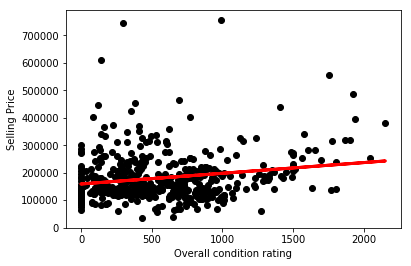

In [86]:
# Set x and y axes 
x = data[[""]]
y = data[['SalePrice']]

# Split the data into the training and validation 
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)
# 0.33 = 33% saved for validation
# 0.67 = 67% saved for train 

# linear regression model of training set 
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))


ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("")
ax.set_ylabel("Selling Price")